## Proyecto Final

In [1]:
import numpy as np

In [2]:
import librosa

In [3]:
import librosa.display

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import json

In [7]:
%matplotlib inline

In [8]:
filename = "nsynth-train/audio/guitar_acoustic_005-040-100.wav"

In [9]:
y, sr = librosa.load(filename)

In [10]:
sr2 = 11025

In [11]:
y2 = librosa.core.resample(y=y, orig_sr=sr, target_sr=sr2, scale=True)

In [12]:
C = np.abs(librosa.cqt(y2, sr=sr2, n_bins=84, bins_per_octave=12))

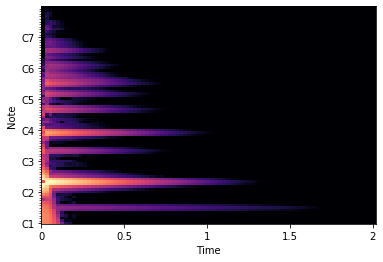

In [13]:
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')

In [14]:
len(C)

84

In [15]:
C[0]

array([2.21220735e+00, 2.02188824e+00, 1.55036384e+00, 9.39309518e-01,
       3.85943024e-01, 6.57785986e-02, 9.55878329e-03, 6.97210487e-03,
       1.94648691e-03, 1.43235074e-04, 2.16250090e-05, 6.20342458e-05,
       1.99316865e-05, 3.60686629e-05, 5.93879043e-05, 4.09369803e-05,
       3.38712321e-05, 1.50782582e-06, 2.87459608e-05, 9.79893347e-06,
       1.62991830e-05, 1.52514052e-05, 2.92323730e-05, 1.21659956e-05,
       2.45640233e-05, 2.30122951e-05, 1.40213441e-05, 2.50856764e-05,
       1.40751915e-05, 1.02141702e-05, 1.29052427e-05, 5.46231495e-06,
       7.64164012e-06, 7.59114376e-06, 1.11551889e-05, 2.53151055e-06,
       8.62258220e-06, 7.11206485e-06, 1.71858881e-05, 1.28641479e-05,
       2.02419456e-05, 2.21780178e-05, 2.00007961e-05, 2.45410316e-05,
       1.86469349e-05, 1.93558896e-05, 2.27968884e-05, 2.88687683e-05,
       3.83721419e-05, 3.92789124e-05, 4.06164096e-05, 3.24082857e-05,
       2.47983214e-05, 2.80441310e-05, 3.28944051e-05, 3.00086259e-05,
      

In [16]:
84*87*3000

21924000

In [17]:
with open('nsynth-train/examples.json', 'r') as f:
    distros_dict = json.load(f)

In [18]:
distros_dict

{'guitar_acoustic_001-082-050': {'note': 16629,
  'sample_rate': 16000,
  'pitch': 82,
  'instrument_source': 0,
  'instrument_family_str': 'guitar',
  'instrument_str': 'guitar_acoustic_001',
  'note_str': 'guitar_acoustic_001-082-050',
  'qualities_str': ['percussive'],
  'instrument_source_str': 'acoustic',
  'velocity': 50,
  'instrument_family': 3,
  'instrument': 39,
  'qualities': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]},
 'bass_synthetic_120-108-050': {'note': 168243,
  'sample_rate': 16000,
  'pitch': 108,
  'instrument_source': 2,
  'instrument_family_str': 'bass',
  'instrument_str': 'bass_synthetic_120',
  'note_str': 'bass_synthetic_120-108-050',
  'qualities_str': ['percussive'],
  'instrument_source_str': 'synthetic',
  'velocity': 50,
  'instrument_family': 0,
  'instrument': 881,
  'qualities': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]},
 'organ_electronic_120-050-127': {'note': 88495,
  'sample_rate': 16000,
  'pitch': 50,
  'instrument_source': 1,
  'instrument_family_str': 'organ',
  '

In [19]:
len(distros_dict)

289205

In [20]:
families = {}

In [21]:
for distro in distros_dict:
    if (distros_dict[distro]['velocity']==127):
        if (distros_dict[distro]['instrument_family_str'] in families):
            families[distros_dict[distro]['instrument_family_str']].append(distros_dict[distro])
        else:
            families[distros_dict[distro]['instrument_family_str']] = []
            families[distros_dict[distro]['instrument_family_str']].append(distros_dict[distro])

In [22]:
for family in families:
    print(family)
    print(len(families[family]))

organ
8047
bass
14219
keyboard
10705
guitar
6599
reed
2913
brass
2591
mallet
6905
string
3962
vocal
2224
flute
1925
synth_lead
1107


In [23]:
notes_in_guitar = []

In [24]:
for i in range(len(families['guitar'])):
    if (families['guitar'][i]['velocity'] == 127):
        notes_in_guitar.append(families['guitar'][i]['pitch'])

In [25]:
ninnp = np.array(notes_in_guitar)

In [26]:
ninnp.sort()

In [27]:
ninnp

array([  9,   9,   9, ..., 114, 117, 119])

In [28]:
all_unique = np.unique(ninnp)

In [29]:
len(all_unique)

105

In [30]:
counters = np.zeros(105)

In [31]:
counters 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [32]:
for i in range(len(families['guitar'])):
    for j in range(105):
        if (families['guitar'][i]['velocity'] == 127):
            if (families['guitar'][i]['pitch'] == all_unique[j]):
                counters[j]+=1
    

In [33]:
npcontrs = np.array(counters)

In [34]:
len(npcontrs[npcontrs > 60])

76

In [35]:
(npcontrs > 60)[15]

True

In [36]:
(npcontrs > 60)[51]

True

In [37]:
all_unique[15]

24

In [38]:
all_unique[51]

60

In [39]:
# 24 C1 - 60 C4


In [40]:
to_use = []
for i in range(len(families['guitar'])):
    if (families['guitar'][i]['pitch'] >= 24 and families['guitar'][i]['pitch'] <= 60):
        if (families['guitar'][i]['velocity'] == 127):
            to_use.append(families['guitar'][i])

In [41]:
len(to_use)

2849

In [42]:
notes_in_to_use = {}

In [43]:
for i in range(len(to_use)):
    if (not to_use[i]['instrument_str'] in notes_in_to_use):
        notes_in_to_use[to_use[i]['instrument_str']] = np.zeros(shape=37)
    notes_in_to_use[to_use[i]['instrument_str']][to_use[i]['pitch'] - 24] = 1

In [44]:
complete_instr = []

In [45]:
for instrument in notes_in_to_use:
    suma = 1
    for i in range(len(notes_in_to_use[instrument])):
        if (notes_in_to_use[instrument][i] != 1):
            suma = 0
    if (suma == 1):
        complete_instr.append(instrument)

In [46]:
len(complete_instr)

61

In [47]:
to_use = []
for i in range(len(families['guitar'])):
    if (families['guitar'][i]['pitch'] >= 24 and families['guitar'][i]['pitch'] <= 60):
        if (families['guitar'][i]['velocity'] == 127):
            found = 0
            for j in range(len(complete_instr)):
                if (families['guitar'][i]['instrument_str'] == complete_instr[j]):
                    found = 1
            if (found == 1):
                to_use.append(families['guitar'][i])

In [48]:
len(to_use)

2257

In [49]:
to_use[0]['instrument_source_str']

'synthetic'

In [50]:
counters_sources = {}
for i in range(len(to_use)):
    if (not to_use[i]['instrument_source_str'] in counters_sources):
        counters_sources[to_use[i]['instrument_source_str']] = 0
    counters_sources[to_use[i]['instrument_source_str']] += 1
counters_sources

{'synthetic': 407, 'acoustic': 814, 'electronic': 1036}

In [51]:
acoustics_guitars = []
for i in range(len(to_use)):
    if to_use[i]['instrument_source_str'] == 'acoustic':
        acoustics_guitars.append(to_use[i])

In [52]:
acoustics_guitars[700]

{'note': 150100,
 'sample_rate': 16000,
 'pitch': 25,
 'instrument_source': 0,
 'instrument_family_str': 'guitar',
 'instrument_str': 'guitar_acoustic_002',
 'note_str': 'guitar_acoustic_002-025-127',
 'qualities_str': ['fast_decay', 'reverb'],
 'instrument_source_str': 'acoustic',
 'velocity': 127,
 'instrument_family': 3,
 'instrument': 71,
 'qualities': [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]}

In [84]:
filename = "nsynth-train/audio/guitar_acoustic_007-060-127.wav"

In [85]:
y, sr = librosa.load(filename,sr=None)

In [86]:
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))

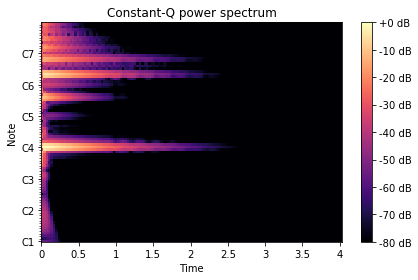

In [87]:
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [57]:
C = librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12)

In [58]:
len(C)

84

In [59]:
instrument_names = {}
list_instrument_names = []
for i in range(len(acoustics_guitars)):
    if not acoustics_guitars[i]['instrument_str'] in instrument_names:
        instrument_names[acoustics_guitars[i]['instrument_str']] = 1
        list_instrument_names.append(acoustics_guitars[i]['instrument_str'])
npinstruments = np.array(list_instrument_names)
npinstruments.sort()
npinstruments

array(['guitar_acoustic_000', 'guitar_acoustic_001',
       'guitar_acoustic_002', 'guitar_acoustic_003',
       'guitar_acoustic_004', 'guitar_acoustic_005',
       'guitar_acoustic_006', 'guitar_acoustic_007',
       'guitar_acoustic_008', 'guitar_acoustic_009',
       'guitar_acoustic_011', 'guitar_acoustic_016',
       'guitar_acoustic_017', 'guitar_acoustic_018',
       'guitar_acoustic_019', 'guitar_acoustic_020',
       'guitar_acoustic_024', 'guitar_acoustic_026',
       'guitar_acoustic_028', 'guitar_acoustic_032',
       'guitar_acoustic_033', 'guitar_acoustic_034'], dtype='<U19')

In [60]:
file_base_name = "nsynth-train/audio/"

In [61]:
all_files = []
for i in range(len(acoustics_guitars)):
    filename = file_base_name + acoustics_guitars[i]['note_str'] + ".wav"
    y, sr = librosa.load(filename,sr=None)
    C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
    for j in range(4):
        current_segment = []
        segment_name = acoustics_guitars[i]['note_str'] + "_seg_" + str(j)
        current_segment.append(segment_name)
        for k in range(84):
            current_segment.append(C[k][j])
        current_segment.append(str(acoustics_guitars[i]['pitch']))
        all_files.append(current_segment)
all_files = np.array(all_files)

In [62]:
column_names = ["segment_name"]
base_note_name = "note_"
for i in range(84):
    note_name = base_note_name + str(i + 24)
    column_names.append(note_name)
column_names.append("NOTE_CLASS")

In [88]:
df = pd.DataFrame(data=all_files[:,:], columns=column_names)
df

,segment_name,note_24,note_25,note_26,note_27,note_28,note_29,note_30,note_31,note_32,...,note_99,note_100,note_101,note_102,note_103,note_104,note_105,note_106,note_107,NOTE_CLASS
0,guitar_acoustic_001-042-127_seg_0,0.1548396758272465,0.21162235488528283,0.27339401081193865,0.33918030901241114,0.4105982238979489,0.4860930198251672,0.5652167856310252,0.6455246065605451,0.7055886476822231,...,3.7885490538851794e-05,1.5311551318393004e-05,1.870966101070397e-06,1.832943404286949e-05,8.316579176575785e-06,3.9076648754583695e-05,3.5763742118685775e-05,5.105543487994791e-05,2.11414371213532e-05,42
1,guitar_acoustic_001-042-127_seg_1,0.14865352420076297,0.20248682732713844,0.25893947386066524,0.31955088081352306,0.3837413824757683,0.4510814140314256,0.518868006329486,0.5852290308566739,0.6334927519439144,...,0.04762325434866989,0.015559043634852101,0.01811104458249709,0.014533650297154168,0.008226192868327858,0.010360438782171614,0.014441596849455026,0.008667981941052722,0.003155229680306545,42
2,guitar_acoustic_001-042-127_seg_2,0.13246161845622467,0.17783167815307035,0.22213563008240203,0.2694108793899601,0.3167880061470374,0.36207314734165963,0.4039013511541249,0.4367056819831994,0.4580677557593132,...,0.013854109796773987,0.000846321366645687,0.0023305840890107074,0.0018141528729064146,0.004119008154421155,0.00440645517994806,0.0009024598898683947,0.0006787049657676877,0.0013428408854527668,42
3,guitar_acoustic_001-042-127_seg_3,0.10867733895496602,0.14073855298161575,0.17048595547463752,0.19929073737870456,0.22416698824840192,0.24261158137301447,0.25136708631805427,0.2489693080512304,0.2418065995408254,...,0.014981652638917852,0.0070069017336476195,0.003697448063741973,0.00309586712346008,0.0008150099748880614,0.002419585980409444,0.0024946556969354544,0.0015128041767926825,0.0002903539822933042,42
4,guitar_acoustic_004-033-127_seg_0,0.2665652028886773,0.43013401153111186,0.5818432409547265,0.699358685484074,0.7593690342389483,0.7292998568142924,0.5700941229397327,0.07458023877078808,1.874282348714416,...,5.501746627652433e-07,4.781886206400299e-07,7.108053809553251e-07,8.970850564369581e-07,6.791063943939393e-07,1.4770395968244498e-06,1.9648396650626448e-07,7.979831352343817e-07,1.6047887803798125e-07,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,guitar_acoustic_026-060-127_seg_3,0.3128918375472502,0.31833682526523954,0.31756775407281007,0.3135946669912808,0.3042061507873016,0.28850208200586736,0.26551108230360376,0.23672918847073635,0.20952752494465265,...,0.09060251448372174,0.10610809616542578,0.05610999270469045,0.011131912336763196,0.0331234307951551,0.02373260817132681,0.018034044540355773,0.03701983165047271,0.04718326573072677,60
3252,guitar_acoustic_002-042-127_seg_0,0.45726032931360555,0.4228486327314009,0.30577141242939543,0.1026331800263919,0.18385927643938918,0.5254607895038081,0.8637589122938868,1.1124859301178949,1.1512402627389884,...,2.0618637816450562e-05,2.642957643511047e-06,1.3435159533535109e-05,1.2072932703553653e-06,4.276874305732596e-06,2.8458301007481548e-05,1.2967388577397697e-05,3.389439542710119e-06,2.0961770858611154e-06,42
3253,guitar_acoustic_002-042-127_seg_1,0.4387334557786869,0.4036912168580886,0.29341380217306556,0.11491179704115223,0.18970652164073423,0.49636591989079254,0.7985316168752075,1.0133972290087783,1.0393125115133353,...,0.0728899333271029,0.019564434190524078,0.03882729311313516,0.03531958849508476,0.005206877502471014,0.015915537402639034,0.03260285235128136,0.06745135639540611,0.05517935759730043,42
3254,guitar_acoustic_002-042-127_seg_2,0.38990515722765556,0.35416741550726255,0.2604998314719337,0.13367541309159833,0.19685114090432898,0.42202188422619125,0.6369841568887014,0.7697962535157108,0.7673461199315987,...,0.04372645759841629,0.03026812047339634,0.05057127421225379,0.021916981556870798,0.007041478630295643,0.010519602186439847,0.02244587464419417,0.02173963034875114,0.01034854306201443,42


In [90]:
df.to_csv('guitar_notes_data.csv',index=False)

In [77]:
filename = "Probando3.wav"

In [78]:
import IPython.display

In [79]:
y, sr = librosa.load(filename,sr=None)

In [80]:
IPython.display.Audio(data=y, rate=sr)

In [81]:
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))

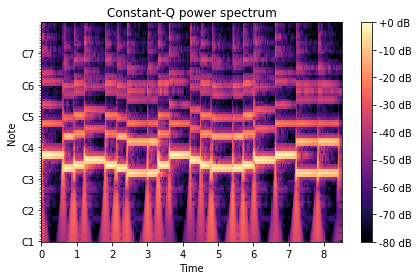

In [82]:
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [70]:
len(C[0])

390